## MA5114 - Programming for Biology 

### GC Content & Gene Length

#### Worked Practical

GC content has long been known to be associated with gene coding, as distinct from non-gene coding regions of a genome - the basis for this association is believed to be a consequence of the inherent stability an enhanced density of GC content provides, and this, associated with the strong positive selection of gene coding regions, as against non-gene coding regions, results in the apparent GC-content disparity.

An interesting question to ask is, does the GC content vary in any significant way within a genome's gene coding regions, specifically as a function of gene length, or is it independent of length? There is some evidence to suggest that shorter gene coding regions are under stronger selective pressure - that being so there may be some discrepancy apparent in the GC content between shorter and longer genes.

In this walk-through practical we are going to try and test this hypothesis, by analysing the most recent census of mRNAs identified in the model organism *Saccharomyces cerevisiae* (yeast), which you will find in the Blackboard directory for this practical, `mrna.fa`

Try and complete the following steps

1) How many mRNA transcripts are in this FASTA file?

*hint: count the number of times you find '>'*

2) Calculate the lengths of all the transcripts and plot the length distribution

*hint: you'll need to figure out a way of concatenating each FASTA read for each entry, and use this to calculate the length*

3) Take two reasonable extremes (such the same number of gene lengths above and below a threshold), and use this to calculate the average GC percent for each group

*hint: create a histogram plot using matplotlib (https://datatofish.com/plot-histogram-python/) and use this to roughly select out extremes length ranges at either end, then compute the GC percent for each sequence within these range bands*

4) Comment on the results...

### Need to figure out a way to talk to the fasta file

Let's examine the mRNA.fa file using bash (shell) commands inside a code cell - this assumes that the file `mnra.fa` is in the same working directory as the notebook

In [3]:
!head -11 mrna.fa

>A18178 1
caccaataaaaaaacaagcttaacctaattc
>A21196 1
cggccagatcta
>A21197 1
agcttagatctggccgggg
>HV532957 1
ctgaggattcgggtaaaatagggtatttaactggttaccggaaaggttta
gaaaattcgtggagggttggccgagcggtctaaggcggcagacttaagat
ctgttggacggttgtccgcgcgagttcgaacctcgcatccttcagtattt
tttttgatgatttaacgtactattaactagaataatagggaaatgca


Ok, let's take the top 11 lines and put it into a dummy file called `test.fa`, again working from the command line.

In [4]:
!head -11 mrna.fa > test.fa
!more test.fa

>A18178 1
caccaataaaaaaacaagcttaacctaattc
>A21196 1
cggccagatcta
>A21197 1
agcttagatctggccgggg
>HV532957 1
ctgaggattcgggtaaaatagggtatttaactggttaccggaaaggttta
gaaaattcgtggagggttggccgagcggtctaaggcggcagacttaagat
ctgttggacggttgtccgcgcgagttcgaacctcgcatccttcagtattt
tttttgatgatttaacgtactattaactagaataatagggaaatgca


Now let's see if we can import this file and do a basic screen dump

In [5]:
with open('test.fa','r') as infile:
    
    for line in infile:
        print(line.strip())

>A18178 1
caccaataaaaaaacaagcttaacctaattc
>A21196 1
cggccagatcta
>A21197 1
agcttagatctggccgggg
>HV532957 1
ctgaggattcgggtaaaatagggtatttaactggttaccggaaaggttta
gaaaattcgtggagggttggccgagcggtctaaggcggcagacttaagat
ctgttggacggttgtccgcgcgagttcgaacctcgcatccttcagtattt
tttttgatgatttaacgtactattaactagaataatagggaaatgca


Ok, now that we can show that we can import this file, let's think about some code

I thought about some code, but it was messy, and I was busy, so I found this https://gamma2.wordpress.com/2014/01/03/reading-a-fasta-file-with-python/ in particular the last code example... 

```
name = None
seqs = dict()
for line in f:
    #let's discard the newline at the end (if any)
    line = line.rstrip()
    #distinguish header from sequence
    if line[0]=='>': #or line.startswith('>')
        #it is the header
        name = line[1:] #discarding the initial >
        seqs[name] = ''
    else:
        #it is sequence
        seqs[name] = seqs[name] + line
```

So I thought I'd change it a little and try it out on the smaller `test.fa` file

In [6]:
name = None
seqs = dict()

with open('test.fa','r') as in_file:

   for line in in_file:
    #let's discard the newline at the end (if any)
       line = line.rstrip()
    #distinguish header from sequence
       if line[0]=='>': #or line.startswith('>')
        #it is the header
           name = line.split(' ')[0][1:] #discarding the initial >
           seqs[name] = ''
       else:
        #it is sequence
           seqs[name] = seqs[name] + line

Lets do it again for the whole FASTA file

In [12]:
name = None
seqs = dict()

with open('mrna.fa','r') as in_file:

   for line in in_file:
    #let's discard the newline at the end (if any)
       line = line.rstrip()
    #distinguish header from sequence
       if line[0]=='>': #or line.startswith('>')
        #it is the header
           name = line.split(' ')[0][1:] #discarding the initial >
           seqs[name] = ''
       else:
        #it is sequence
           seqs[name] = seqs[name] + line

In [13]:
print (seqs)

{'A18178': 'caccaataaaaaaacaagcttaacctaattc', 'A21196': 'cggccagatcta', 'A21197': 'agcttagatctggccgggg', 'HV532957': 'ctgaggattcgggtaaaatagggtatttaactggttaccggaaaggtttagaaaattcgtggagggttggccgagcggtctaaggcggcagacttaagatctgttggacggttgtccgcgcgagttcgaacctcgcatccttcagtattttttttgatgatttaacgtactattaactagaataatagggaaatgca', 'HV764292': 'ggggatttagctcagttgggagagcgccagactgaagatctggaggtcctgtgttcgatccacagaattcccacca', 'CS106198': 'tgtgagttagctcactcattaggcaccccaggctttacactttatgcttccggctcgtatgtggaattgtgabcggataacaattcgacacaggaaacagctatg', 'DD364391': 'gcggatttagctcagttgggagagcgccagactcccgaatctggaggtcctgtgttcgatccacagaattcgcacca', 'DD465423': 'ggggatttagctcagttgggagagcgccagactgaagatctggaggtcctgtgttcgatccacagaattcccacca', 'DD495503': 'ggggatttagctcagttgggagagcgccagactgaagatctggaggtcctgtgttcgatccacagaattcccacca', 'DJ048647': 'gcggatttagctcagttgggagagcgccagactcccgaatctggaggtcctgtgttcgatccacagaattcgcacca', 'DL128416': 'gcggatttactcaggggagagcccagataaatggagtctgtgcgtccacagaattcgcacca', 'DL128417': 'gcggattt

Let's save this dictionary as a pickle so we can use it again later

In [14]:
import pickle

pickle.dump(seqs, open( "genes_seqs_dictionary.p", "wb"))


Let's just check to see it's there

In [15]:
!ls genes_seqs_dictionary.p

genes_seqs_dictionary.p


Perfect... Ok let's go - *and thanks to Guiseppe*...

### 1) How many mRNA transcripts are in this FASTA file?

Loop over, every time we see a '>', update a counter, print to screen

In [16]:
cnt = 0

with open('mrna.fa','r') as infile:
    
    for line in infile:
        if line[0] == '>':
            cnt = cnt + 1    
            
print ('There are',cnt,'transcripts' )            

There are 474 transcripts


An alternative could be to count the number of entries in the the dictionary `seqs`

In [17]:
print ('There are',len(seqs),'transcripts' )            

There are 474 transcripts


### 2) Calculate the lengths of all the transcript and plot the length distribution

 - it's small enough to just use the dictionary...
 - create a dummy list to hold lengths
 - loop through keys, for each key get value (sequence) and finds it's length
 - next code cell does the plot thing

In [18]:
# we can use seqs from before

# set up dummy list
          
lengths = []

# fill up list with gene lengths          
          
for gene in seqs:
    this_length = len(seqs[gene])   #  this uses the gene key to get the DNA sequence
    lengths.append(this_length)     #  & then calculate it's length, adds to list `lengths`

In [19]:
gene_length = {'Gene':'Length'}     # does the same except makes a new dictionary which
for gene in seqs:                   # maps each gene name to it's length
    this_length = len(seqs[gene])
    gene_length[gene] = this_length 

In [20]:
with open('gene_length.txt','w') as handle:           #  writes out file
    for gene in gene_length:
        handle.write(gene+','+str(gene_length[gene])+'\n')

In [57]:
!ls gene_length.txt

gene_length.txt


In [21]:
# check to see lengths is a thing

print('First 10 elements are:',lengths[0:10])
print('Total number of entries',len(lengths))

First 10 elements are: [31, 12, 19, 197, 76, 105, 77, 76, 76, 77]
Total number of entries 474


Ok now we need to see what it looks like - we need to compute it's distribution using a histogram function

In [22]:
import matplotlib.pyplot as plt

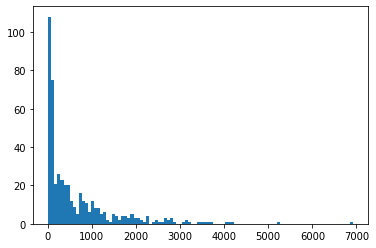

In [23]:
plt.hist(lengths, bins = 100)
plt.show()

By changing the bin sizes, we can make the histogram more or less 'granular' - it's clear that the majority of the sequences have a length between 1 & 1000...

Just for curiosity's sake, what is the mean length...?

Import the `statistics` module...

In [24]:
from statistics import mean,stdev 

print (int(mean(lengths)))

661


So there are 474 genes... 

Let's aim for a 50 per group, with one group being the 'long transcripts' and the other being the 'short transcripts'...

Together they would make up 100/474 or almost 20% of the sample.

How many > 1000 say?

In [25]:
count = 0
threshold = 1000
for this_length in lengths:
   if this_length > threshold:
      count = count + 1
print (count)        

108


How many > 1750?

In [26]:
count = 0
threshold = 1750
for this_length in lengths:
   if this_length > threshold:
      count = count + 1
print (count)        

52


Ok so let's choose all the reads > 1750 for the 'long transcripts'.

We'll select 50 reads with a length < 175 but > 50 just to start off for the 'short transcript' group.

In [27]:
# loop through for the 'long transcripts'

long_seqs = []   #  dummy list to hold these sequences
          
for gene in seqs:
    this_length = len(seqs[gene])
    if this_length > 1750:
        long_seqs.append(seqs[gene])


Print out the total number of DNA sequences we have collected, and then print the first one just to see it's all correct...

In [28]:
print(len(long_seqs))

52


In [30]:
print(long_seqs[0])    #   this is what a long gene looks like...

gatccaaatgtaaataaacaatcacaaggaaaaaaaaaaaaaaaaaaaaaatagccgccatgaccccggatcgtcggcttgtgatacggtcagggtagcgccctggtcaaacttcagaactaaaaaaataactaaggaagaaaaaaatagctaatttttccggcagaaagattttcgctacccgaaagtttttccggcaagctaaatggaaaaaggaaagattattgaaagagaaagaaagaaaaaaaaaaaatgtacacccagacatcgggcttccataatttcggctctattgttttccatctctcgcaacggcgggattcctctatggcgtgtgatgtctgtatctgttacttaatccagaaactggcacttgacccaactctgccacgtgggtcgttttgccatcgacagattgggagattttcatagtagaattcagcatgatagctacgtaaatgtgttccgcaccgtcacaaagtgttttctactgttctttcttctttcgttcattcagttgagttgagtgagtgctttgttcaatggatcttagctaaaatgcatattttttctcttggtaaatgaatgcttgtgatgtcttccaagtgatttcctttccttcccatatgatgctaggtacctttagtgtcttcctaaaaaaaaaaaaaggctcgccactcaaaacgatattcgttggcttttttttctgaattataaatactctttggtaacttttcatttccaagaacctcttttttccagttatatcatggtcccctttcaaagttattctctactctttttcatattcattctttttcatcctttggttttttattcttaacttgtttattattctctcttgtttctatttacaagacaccaatcaaaacaaataaaacatcatcacaatgtctagattagaaagattgacctcattaaacgttgttgctggttctgacttgagaagaacctccatcattggtaccatcggtccaaa

Ok, lets load up all of the sequences reads with a length < 175 but > 50, call them the 'short transcripts'.

In [31]:
short_seqs = []   #  dummy list to hold these sequences
          
for gene in seqs:
    this_length = len(seqs[gene])
    if this_length > 50 and this_length < 175:
        short_seqs.append(seqs[gene])

Again, print out the total number of DNA sequences we have collected, and then print the first one just to see it's all correct...

In [32]:
print(len(short_seqs))

159


In [33]:
print(short_seqs[0])    #    this is an example of a short gene

ggggatttagctcagttgggagagcgccagactgaagatctggaggtcctgtgttcgatccacagaattcccacca


So there are 159 DNA sequences... we'll probably just use the first 50 later on...

Ok now we need to define a GC% function

In [34]:
def gc_percent(sequence):
    g = sequence.count('g')
    c = sequence.count('c')
    ratio = (g + c)/(len(sequence))
    return(ratio)

Ok so now let's loop through the long seqs, calculate percentage for each and put in a list... 

First up the 'long transcripts'

In [42]:
long_seq_gc = []

for sequence in long_seqs:                    #  this loops over all the sequences, finds the
    long_seq_gc.append(gc_percent(sequence)*100)  # GC% of the current one, adds it to a list
    

In [43]:
print('Long transcripts GC% mean/min/max values',round(mean(long_seq_gc),2),round(min(long_seq_gc),2),round(max(long_seq_gc),2))

Long transcripts GC% mean/min/max value 39.43 32.41 58.05


In [45]:
print('Long transcripts mean/stdev values',round(mean(long_seq_gc),2),round(stdev(long_seq_gc),2))

Long transcripts mean/stdev values 39.43 3.78


Ok so now let's loop through the short seqs, calculate percentage for each and put in a list

In [49]:
short_seq_gc = []

for i in range(0,50):    #  pick the first 50, use range to iterate through...
    short_seq_gc.append(gc_percent(short_seqs[i])*100)

In [51]:
print('Short transcripts GC% mean/min/max values',round(mean(short_seq_gc),2), round(min(short_seq_gc),2), round(max(short_seq_gc),2))

Short transcripts GC% mean/min/max value 48.27 20.27 61.33


In [52]:
print('Short transcripts GC% mean/stdev values', round(mean(short_seq_gc),2),round(stdev(short_seq_gc),2))

Short transcripts GC% mean/stdev values 48.27 9.36


Hmmm - they look like they're different...!

What about a boxplot...

In [55]:
import warnings
warnings.filterwarnings('ignore')

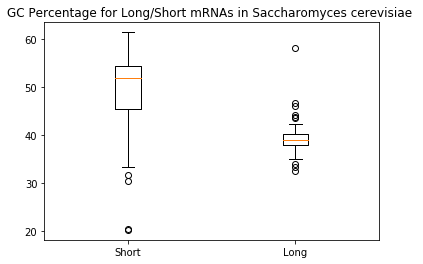

In [56]:
data = [short_seq_gc,long_seq_gc]
data_names = ['Short', 'Long']
fig1, ax1 = plt.subplots()
ax1.set_title('GC Percentage for Long/Short mRNAs in Saccharomyces cerevisiae ')
ax1.boxplot(data)
ax1.set_xticklabels(data_names, fontsize=10)
plt.show();

Well - does seem to suggest a difference in GC% between short and long mRNA in this organism!